# Agglomerative HC Clustering

In [1]:
#Menampilkan Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Python TIA/ml-1m/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3,4]].values #baris: semua, kolom: 3 dan 4 saja 
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the Dendrogram to find the optimal numbers of clusters

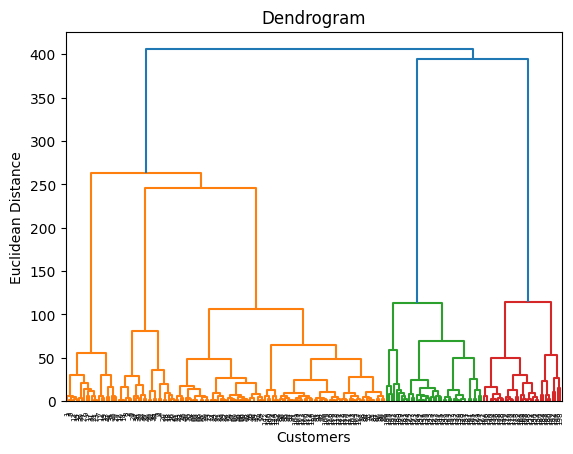

CPU times: user 2.24 s, sys: 279 ms, total: 2.52 s
Wall time: 2.37 s


In [5]:
%%time 
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Training the Hierarchical Clustering Model on the dataset

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [7]:
y_hc.shape

(200,)

In [8]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visualising the clusters

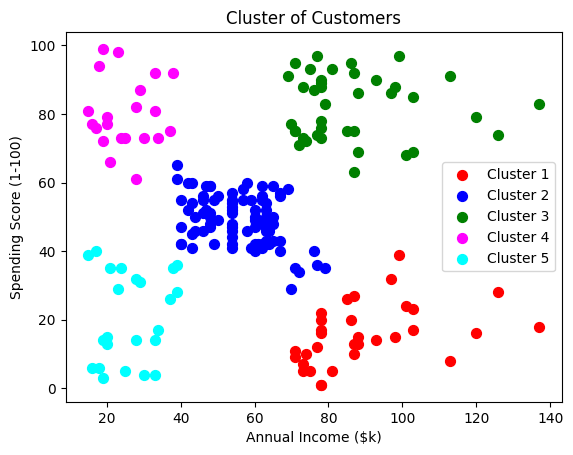

CPU times: user 349 ms, sys: 112 ms, total: 461 ms
Wall time: 362 ms


In [9]:
%%time
# scatter plot CLUSTER 1 : X = annual income customer kategori 1 (0), y = spending score customer kategori 1 (0)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50,c='red', label='Cluster 1')
# scatter plot CLUSTER 2 : X = annual income customer kategori 2 (1), y = spending score customer kategori 2 (1)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50,c='blue', label='Cluster 2')
# scatter plot CLUSTER 3 : X = annual income customer kategori 3 (2), y = spending score customer kategori 3 (2)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50,c='green', label='Cluster 3')
# scatter plot CLUSTER 4 : X = annual income customer kategori 4 (3), y = spending score customer kategori 4 (3)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='magenta', label='Cluster 4')
# scatter plot CLUSTER 5 : X = annual income customer kategori 5 (4), y = spending score customer kategori 5 (4)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='cyan', label='Cluster 5')
#plt info
plt.title('Cluster of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()